In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

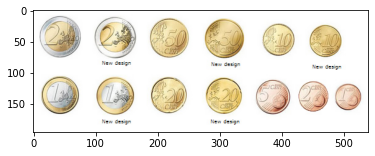

In [5]:
image = cv2.imread('img/coins2.jpg')
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

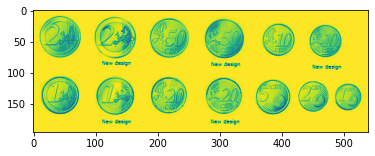

In [20]:
coins_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(coins_gray)

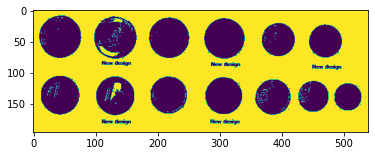

In [26]:
ret , th = cv2.threshold(coins_gray, 244, 255, cv2.THRESH_BINARY)
plt.imshow(th)

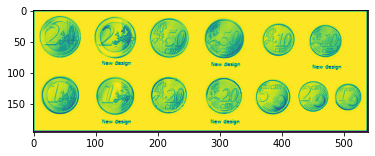

In [32]:
contours, h = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
coins_with_contours = coins_gray.copy()
cv2.drawContours(coins_with_contours, contours, -1, (0, 255, 0), 2)
plt.imshow(coins_with_contours)

In [ ]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)
